In [64]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as scs
%matplotlib inline


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_boston
import sklearn
import seaborn as sns

* What is Linear Regression?
 - We are hypothesizing a linear relationship between a target (or 'endogenous' variable) and some features (predictors, or 'exogenous' variables)

### Simple Linear Regression:
* *Computing coefficients*

* Estimate B0 (intercept) and B1 (slope) based on least squares

#### "Residuals" are the discrepancies between the actual and predicted y values
#### Total residuals for a given model is the "residual sum of squares" (RSS) Least squares line minimizes RSS


In [2]:
boston = load_boston()
X = boston.data # housing features
y = boston.target # housing prices

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
def rmse(actual, predicted): # true = predicted
    mse = ((actual - predicted)**2).mean()
    return np.sqrt(mse)

In [6]:
foo = np.array([4,3,1,6,8])
bar = np.array([4,6,1,3,7])
print(rmse(foo,bar))


1.9493588689617927


#### Sklearn Linear Regression:
* First we split the data using **from sklearn.model_selection import train_test_split** 
* Then we create a place holder fo our model/ instantiate our model
* Then we fit our model. 
* 

In [7]:
# can get scoring metrics using sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso


In [8]:
# fit a model using the training set
linear = LinearRegression()
linear.fit(X_train, y_train)

# Call predict to get the predicted values for training and test set
train_predicted = linear.predict(X_train)
y_predict = linear.predict(X_test)


## Calculate RMSE for training and test set
print( 'RMSE for training set ', rmse(y_train, train_predicted) )
print( 'RMSE for test set ', rmse(y_test, y_predict) )

RMSE for training set  4.615112825082635
RMSE for test set  4.933916373436566


In [9]:
linear.coef_

array([-1.22510116e-01,  4.65483535e-02,  2.73590352e-02,  2.09075665e+00,
       -1.63685672e+01,  3.72903935e+00,  7.54935437e-03, -1.51848413e+00,
        3.33109518e-01, -1.27370187e-02, -9.96548862e-01,  9.27954705e-03,
       -5.57264744e-01])

In [10]:
r2_score(y_test, y_predict)

0.730265529480639

In [11]:
mean_squared_error(y_test, y_predict)**0.5

4.933916373436566

In [12]:
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [13]:
linear.rank_

13

In [14]:
linear.score(X, y)

0.7386465689090014

In [15]:
linear.intercept_

37.13708127792624

### We are using sm.OLS method for this regression

In [16]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'
prestige = pd.read_csv(url)
y = prestige['prestige'].values
x = prestige[['income', 'education']].values

In [17]:
prestige.head() ### Dependent variable: prestige
                ###Independent variables: income, education

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


In [18]:
# sns.pairplot(prestige, X, y, kind = 'reg' )

In [19]:
y = prestige['prestige']

In [20]:
X = prestige[['income', 'education']]

In [21]:
X = sm.add_constant(X) # If we use sm.OLS method we need to add constant, in sklearn it's added by default

In [22]:
X.head()

,const,income,education
0,1.0,62,86
1,1.0,72,76
2,1.0,75,92
3,1.0,55,90
4,1.0,64,86


In [23]:
prestige.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


In [24]:
prestige.head()

,Unnamed: 0,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90


In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
model = sm.OLS(y_train, X_train) # ----- for some reason I had to put y before X!!! FYI!
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     73.03
Date:                Fri, 01 Mar 2019   Prob (F-statistic):           2.97e-12
Time:                        14:10:32   Log-Likelihood:                -133.11
No. Observations:                  33   AIC:                             272.2
Df Residuals:                      30   BIC:                             276.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9828      5.162     -1.353      0.186     -17.525       3.559
income         0.5805      0.138      4.195      0.000       0.298       0.863
education      0.5881      0.118      4.988      0.000       0.347       0.829
==============================================================================
Omnibus:                        0.859   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.273
Skew:                           0.201   Prob(JB):                        0.872
Kurtosis:                       3.193   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Plot the studentized residuals against the fitted y-values. 
* Why do we need to use the studentized residuals as opposed to just the residuals?

In [27]:
residuals = results.resid
student_resids = results.outlier_test()['student_resid']

In [28]:
residuals.shape

(33,)

In [29]:
y_train.shape

(33,)

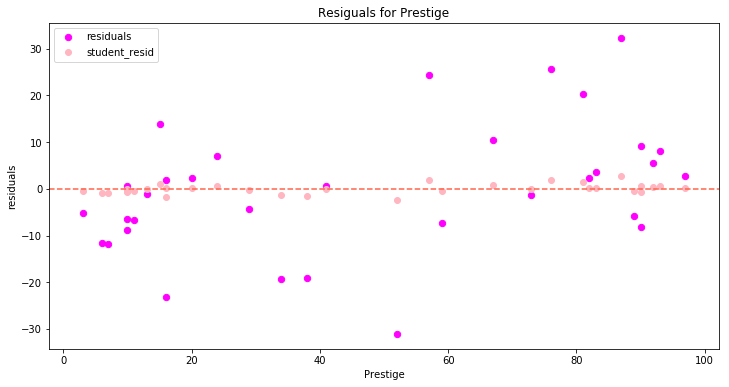

In [30]:
fig, (ax1) = plt.subplots(1, figsize=(12, 6))

# ax1.scatter(credit_model.fittedvalues, student_resid, edgecolor='none', alpha=.3
plt.scatter(y_train, residuals, color='Magenta', s=40, label = 'residuals')
plt.scatter(y_train, student_resids, color = 'Lightpink')
plt.xlabel('Prestige')
plt.legend()
plt.ylabel('residuals')
plt.title("Resiguals for Prestige") 

ax1.axhline(0, color='Tomato', linestyle='--')




#### The QQ plot puts the empirical sample quantiles of the residuals on the y-axis and the theoretical normal distribution quantiles on the x-axis.

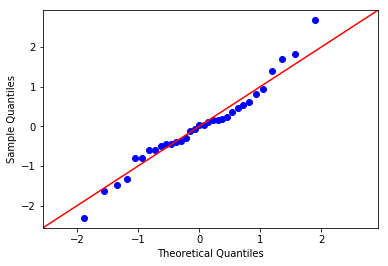

In [31]:
sm.graphics.qqplot(student_resids, line='45', fit=True)
plt.show()

### Influence Plots

AttributeError: 'OLS' object has no attribute 'get_influence'

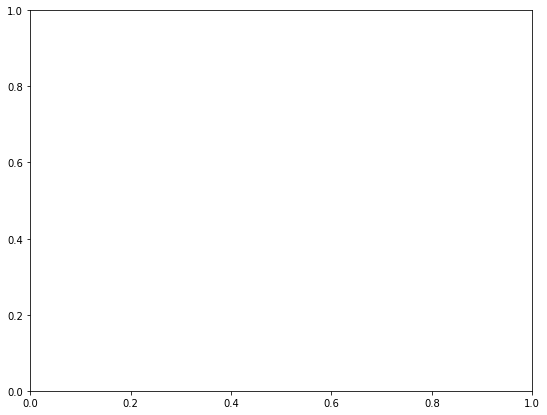

In [33]:
fig, ax = plt.subplots(figsize=(9,7))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [ ]:
from statsmodels.stats.diagnostic import HetGoldfeldQuandt
goldfeld = HetGoldfeldQuandt() ###??? suppose to return F- statistic

In [34]:
sm.stats.het_goldfeldquandt(residuals, X_train)  ### F - statistic and p value H 0 - homo

(1.3215321040142314, 0.30527572458798363, 'increasing')

### Ridge Regression 
####  Fit a ridge regression with alpha = 0.5 to your training dataset. Use the fit model to generate predictions on your testing dataset. Calculate the MSE of your fit model on the test set.

In [35]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [37]:
preds = ridge.predict(X_test)
mse = rss(y_test, preds)
print("MSE for Ridge(alpha=0.5): {:2.2f}".format(mse))

MSE for Ridge(alpha=0.5): 116.94


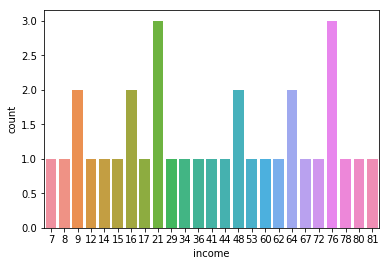

In [45]:
sns.countplot(X_train['income'], saturation=0.85)

In [47]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
predicts = lasso.predict(X_test)
mse = rss(y_test, predicts)
print("MSE for Lasso(alpha=0.001): {:2.2f}".format(mse))

MSE for Lasso(alpha=0.001): 116.94


In [51]:
np.exp(0.042) # ---->  это число е в степени 0.042

1.0428944787507632

# LOGISTIC REGRESSION

In [52]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [54]:
def ROC_curve(prob, labels):
    sorted_prob = sorted(prob)
    thresholds = []
    tpr_list = []
    fpr_list = []
    for thresh in sorted_prob:
        
        thresholds.append(thresh)
        predicted_label = prob > thresh
        tpr = sum(labels[predicted_label]) / sum(labels)
        fpr = sum(~labels[predicted_label].astype(bool)) /( len(labels) - sum(labels) )
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list, thresholds

In [55]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=2, n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegression()
model.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = ROC_curve(probabilities, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'True positive rate')

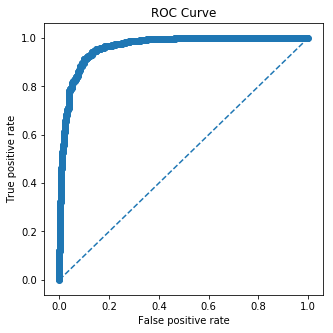

In [56]:
plt.figure(figsize=(5,5))
plt.scatter( fpr, tpr)
plt.plot( [0,1],[0,1], "--" )
plt.title( "ROC Curve" )
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [69]:
predicts = model.predict(X_test) # -- returns the values predicted by our model


# Confusion Matrix
*shows how confused our model was*

In [82]:
#Here's a little cool pandas trick to make a df out of the matrix -- I should have known it, but now I am learning : lol

cm = np.array([[69, 5], [4, 90]])
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0: 'Actual 0', 1: 'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69,5
Actual 1,4,90


In [86]:
#Accuracy --overall correct predictions
# confusion matrix function

def confusion_matrix(X_test, y_test, model):
    y_pred = model.predict(X_test)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(y_test, y_pred, bins = bins)[0]
    accuracy = ((cm[0,0] + cm[1,1])/cm.sum())
    return cm, accuracy

cm = confusion_matrix(X_test, y_test, model)
cm

(array([[550.,  68.],
        [ 52., 580.]]), 0.904)